In [1]:
%load_ext autoreload
%autoreload 2


In [2]:

import torch
from torchvision import datasets, transforms
import numpy as np
#import matplotlib.pyplot as plt
from torch.utils.data import DataLoader


from model import VAE_priorCategorical, VAE_priorHFM
import metadata as md
from datasets import Dataset_HFM, Dataset_pureHFM, load_dsprites, MNISTDigit2Dataset
from utilities import sample_images
from find_gauge import return_minimum_kl_in_g_range
from find_gauge import plot_kl_multiline_from_dicts, save_individual_plots_from_dicts, create_combined_multiline_plot




In [4]:
from utilities import get_empirical_latent_distribution

In [3]:

device = torch.device('cpu')


In [127]:
dataset_2MNIST_train = MNISTDigit2Dataset(train=True, download=True, target_size=60000)
print(f"Dataset size: {len(dataset_2MNIST_train)}")
print(f"Image shape: {dataset_2MNIST_train[0][0].shape}")
print(f"Label: {dataset_2MNIST_train[0][1]}")
train_loader_2MNIST = DataLoader(dataset_2MNIST_train, batch_size=32, shuffle=True)
batch_images, batch_labels = next(iter(train_loader_2MNIST))
print(f"Batch images shape: {batch_images.shape}")
print(f"Batch labels shape: {batch_labels.shape}")
print(f"All labels are 2: {torch.all(batch_labels == 2)}")

print("\n––––––––––––––––––––––––––––––––––––––––––––––––––––––\n")

dataset_2MNIST_val = MNISTDigit2Dataset(train=False, download=True, target_size=10000)
print(f"Dataset size: {len(dataset_2MNIST_train)}")
print(f"Image shape: {dataset_2MNIST_train[0][0].shape}")
print(f"Label: {dataset_2MNIST_train[0][1]}")
print(f"All labels are 2: {torch.all(batch_labels == 2)}")
val_loader_2MNIST = DataLoader(dataset_2MNIST_val, batch_size=32, shuffle=True)
batch_images, batch_labels = next(iter(val_loader_2MNIST))
print(f"Batch images shape: {batch_images.shape}")
print(f"Batch labels shape: {batch_labels.shape}")
print(f"All labels are 2: {torch.all(batch_labels == 2)}")

Found 5958 original samples of digit '2'
Generated 60000 augmented samples
Dataset size: 60000
Image shape: torch.Size([1, 28, 28])
Label: 2
Batch images shape: torch.Size([32, 1, 28, 28])
Batch labels shape: torch.Size([32])
All labels are 2: True

––––––––––––––––––––––––––––––––––––––––––––––––––––––

Found 1032 original samples of digit '2'
Generated 10000 augmented samples
Dataset size: 60000
Image shape: torch.Size([1, 28, 28])
Label: 2
All labels are 2: True
Batch images shape: torch.Size([32, 1, 28, 28])
Batch labels shape: torch.Size([32])
All labels are 2: True


In [131]:
train_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=md.batch_size,
    shuffle=True
    )

val_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=md.batch_size,
    shuffle=False
    )

In [132]:
train_loader = train_loader_MNIST
val_loader = val_loader_MNIST
input_dim = 784

In [6]:
train_loader = train_loader_2MNIST
val_loader = val_loader_2MNIST
input_dim = 784


In [7]:
my_model = VAE_priorCategorical(input_dim=input_dim, categorical_dim=2, latent_dim=10, decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorCategorical/CoarseGrainMNIST/2MNIST/ld10_glog2_ep15_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))

<All keys matched successfully>

In [114]:
my_model = VAE_priorCategorical(input_dim=input_dim, categorical_dim=2, latent_dim=8, decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorCategorical/2MNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))

<All keys matched successfully>

In [128]:
my_model = VAE_priorCategorical(input_dim=input_dim, categorical_dim=2, latent_dim=4, decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorCategorical/2MNIST/ld4_glog2_ep15_lmb01_dr05_gKLlog2_LN_4hl_0.pth', map_location=device))

<All keys matched successfully>

In [ ]:
my_model = VAE_priorCategorical(input_dim=input_dim, categorical_dim=2, latent_dim=4, decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorCategorical/2MNIST/ld4_glog2_ep15_lmb01_dr05_gKLlog2_4hl_0.pth', map_location=device))

# MNIST

In [133]:
my_model = VAE_priorCategorical(input_dim=input_dim, categorical_dim=2, latent_dim=8, decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorCategorical/MNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_LN_4hl_0.pth', map_location=device))

<All keys matched successfully>

In [134]:
empirical_probs, total_samples = get_empirical_latent_distribution(my_model, val_loader, device=device)

In [117]:
batch_images, batch_labels = next(iter(val_loader))
from torch.utils.data import TensorDataset, DataLoader
single_batch_loader = DataLoader(TensorDataset(batch_images, batch_labels), batch_size=10000)
empirical_probs, total_samples = get_empirical_latent_distribution(my_model, single_batch_loader, device=device)

In [120]:
from torch.utils.data import Subset, DataLoader
import numpy as np

# Suppose you want 10% of the validation set
fraction = 0.1
dataset = val_loader.dataset  # get the underlying dataset from your DataLoader
total_len = len(dataset)
subset_len = int(total_len * fraction)

# Randomly select indices for the subset
indices = np.random.choice(total_len, subset_len, replace=False)
subset = Subset(dataset, indices)

# Create a new DataLoader for the subset
subset_loader = DataLoader(subset, batch_size=val_loader.batch_size, shuffle=False)


In [125]:

# Now use this loader
empirical_probs, total_samples = get_empirical_latent_distribution(my_model, subset_loader, device=device)

In [9]:
def count_prob_occurrences(state_prob_dict):
    """
    Given a dictionary with states as keys and probabilities as values,
    returns a dictionary with probabilities as keys and the number of times
    each probability appears as values.
    """
    from collections import Counter
    return dict(Counter(state_prob_dict.values()))

In [135]:
checkdict = count_prob_occurrences(empirical_probs)
print(checkdict)
# If you want to scale the counts (multiplicities) by 10000:
scaled_checkdict = {prob*10000: count for prob, count in checkdict.items()}
print(scaled_checkdict)

{0.0043: 4, 0.0062: 3, 0.0052: 2, 0.0063: 6, 0.0028: 4, 0.0029: 2, 0.0032: 6, 0.008: 2, 0.0054: 2, 0.0075: 1, 0.0107: 1, 0.0124: 2, 0.0093: 2, 0.004: 2, 0.0027: 6, 0.0081: 1, 0.0051: 1, 0.0084: 2, 0.0071: 6, 0.0026: 5, 0.0034: 2, 0.0073: 2, 0.0023: 3, 0.0019: 2, 0.0066: 3, 0.0035: 4, 0.0089: 2, 0.0037: 5, 0.0007: 4, 0.0067: 2, 0.0041: 4, 0.0056: 2, 0.0047: 4, 0.0018: 3, 0.0038: 6, 0.0031: 2, 0.0017: 9, 0.0013: 4, 0.0044: 2, 0.0112: 1, 0.0057: 3, 0.0039: 5, 0.0129: 1, 0.0025: 6, 0.0045: 4, 0.0014: 10, 0.0065: 2, 0.005: 4, 0.0059: 2, 0.0036: 4, 0.0095: 1, 0.0082: 1, 0.0097: 1, 0.0024: 2, 0.0022: 2, 0.0094: 1, 0.0046: 2, 0.0061: 3, 0.0058: 2, 0.006: 2, 0.0003: 2, 0.0055: 5, 0.0011: 6, 0.0021: 4, 0.0049: 2, 0.0068: 1, 0.0079: 1, 0.0076: 1, 0.0008: 4, 0.0087: 2, 0.003: 4, 0.002: 4, 0.0064: 1, 0.0005: 3, 0.0098: 1, 0.0004: 2, 0.0104: 1, 0.0053: 1, 0.0048: 1, 0.0033: 4, 0.0002: 2, 0.0015: 4, 0.0012: 2, 0.001: 1, 0.0001: 2, 0.0042: 2, 0.0006: 3, 0.0009: 1}
{43.0: 4, 62.0: 3, 52.0: 2, 63.0: 6, 

In [103]:
3750+1875

5625

In [98]:
3750*2

7500

In [12]:
def check_probs_normalized(prob_count_dict):
    """
    Given a dictionary with probabilities as keys and their multiplicities as values,
    returns the sum over all probabilities weighted by their multiplicity.
    """
    total = sum(prob * count for prob, count in prob_count_dict.items())
    return total

In [55]:
check_probs_normalized(checkdict)

1.0000000000000002

In [16]:
def relevance_calculation(prob_count_dict):
    """Returns the relevance of the representation. A dict with probabilities as keys and their multiplicities as values is expected."""
    total = - sum(prob * count * np.log(prob * count) for prob, count in prob_count_dict.items())
    return float(total)

In [44]:
relevance_calculation(checkdict)

5.034840722913546

In [18]:
import matplotlib.pyplot as plt

def plot_prob_multiplicities(prob_count_dict):
    """
    Plots multiplicity (number of times a probability appears) vs. probability value
    in log-log scale.
    """
    multiplicities = list(prob_count_dict.values())
    probabilities = list(prob_count_dict.keys())
    plt.figure(figsize=(6,4))
    plt.scatter(multiplicities, probabilities)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Multiplicity')
    plt.ylabel('Probability')
    plt.title('Multiplicity vs Probability (log-log scale)')
    plt.grid(True, which="both", ls="--")
    plt.show()

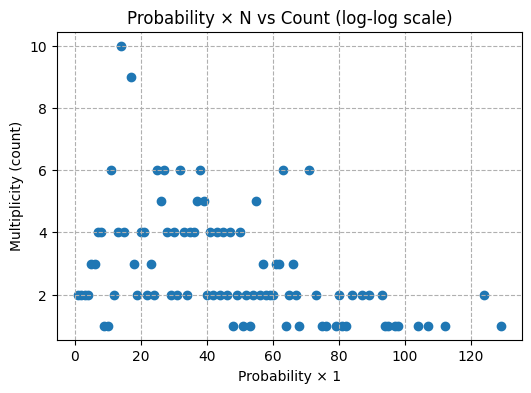

In [137]:
def plot_prob_vs_count(prob_count_dict, total_samples=1):
    """
    Plots probability*total_samples (x-axis) vs. count (y-axis) in log-log scale.
    """
    probabilities = np.array(list(prob_count_dict.keys()))
    counts = np.array(list(prob_count_dict.values()))
    x = probabilities * total_samples
    y = counts
    plt.figure(figsize=(6,4))
    plt.scatter(x, y)
    #plt.xscale('log')
    #plt.yscale('log')
    plt.xlabel('Probability × {}'.format(total_samples))
    plt.ylabel('Multiplicity (count)')
    plt.title('Probability × N vs Count (log-log scale)')
    plt.grid(True, which="both", ls="--")
    plt.show()
plot_prob_vs_count(scaled_checkdict, total_samples=1)